In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import matplotlib
import statsmodels.formula.api as sm

In [2]:
c1 = pd.read_pickle('./data/c1_combo_updated.df') # load C1
d1 = pd.read_pickle('./data/d1_combo_updated.df') # load D1

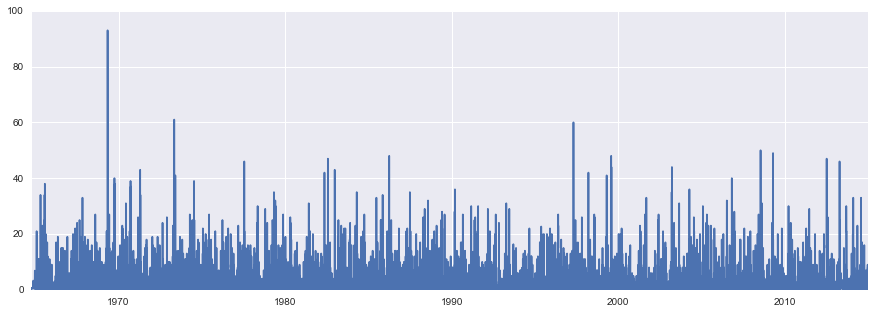

In [3]:
c1.P.plot(figsize=(15,5))

In [4]:
d1elev = 3739.
c1elev = 3022.

In [5]:
def getyear(x):
    return x.year

In [6]:
d1['year'] = d1.index.map(getyear)
c1['year'] = c1.index.map(getyear)

In [7]:
d1 = d1.groupby(by='year').sum()
c1 = c1.groupby(by='year').sum()

In [8]:
deltaelev = d1elev - c1elev

In [9]:
lapse = pd.DataFrame()
lapse['P'] = (d1.P-c1.P)/deltaelev
lapse['P_mult'] = d1.P/c1.P
#lapse['Tmean'] = (d1.Tmean-c1.Tmean)/deltaelev
#lapse['Tmin'] = (d1.Tmin-c1.Tmin)/deltaelev
#lapse['Tmax'] = (d1.Tmax-c1.Tmax)/deltaelev

In [20]:
lapse

,P,P_mult
year,,
1964,0.039052,1.213740
1965,0.852162,1.645195
1966,0.513250,1.677716
1967,0.953975,1.757475
1968,0.266388,1.297508
1969,0.191074,1.135509
1970,-0.115760,0.896380
1971,0.266388,1.268636
1972,0.754533,1.822188


(0, 2.5)

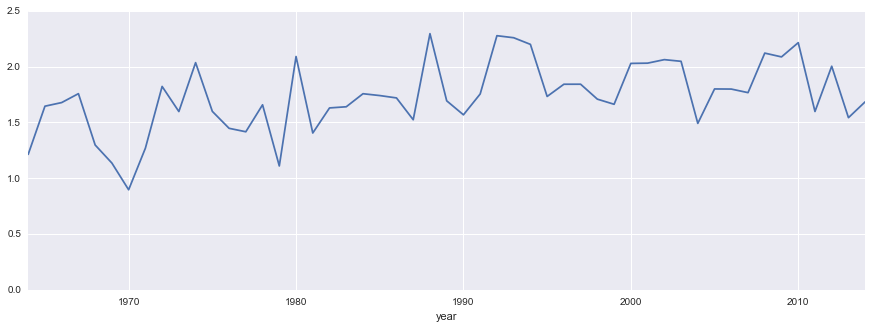

In [10]:
lapse.P_mult.plot(figsize=(15,5))
plt.ylim(0,2.5)

In [19]:
lapse.mean()

P         0.667897
P_mult    1.729220
dtype: float64

In [11]:
lapse.iloc[lapse.index>=1995].P_mult.mean()

1.8531378082462324

In [12]:
lapse.tail(30).describe()/1000

,P,P_mult
count,0.030000,0.030000
mean,0.000767,0.001870
std,0.000172,0.000245
min,0.000445,0.001491
25%,0.000646,0.001697
50%,0.000734,0.001799
75%,0.000885,0.002059
max,0.001167,0.002295


In [13]:
0.0012-0.0004

0.0007999999999999999

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x113518ad0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x113309b90>]], dtype=object)

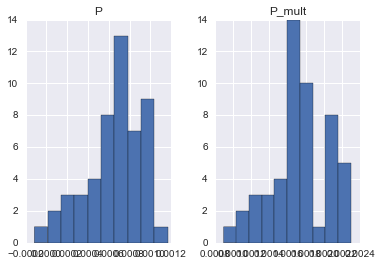

In [14]:
(lapse/1000.).hist()

In [15]:
len(lapse)

51

In [16]:
def getmonth(x):
    return x.month

In [17]:
lapse2 = lapse.resample('M',how='mean')

TypeError: Only valid with DatetimeIndex, TimedeltaIndex or PeriodIndex, but got an instance of 'Int64Index'

In [ ]:
lapse2['month'] = lapse2.index.map(getmonth)

In [ ]:
lapse2['Ptotal'] = c1['P'].resample('M',how='sum')

In [ ]:
lapse['month'] = lapse.index.map(getmonth)

In [ ]:
lapse3 = lapse.groupby(by='month').mean()

In [12]:
# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

In [13]:
#lapse2.loc[lapse2.Ptotal>150,'Ptotal']=np.NaN

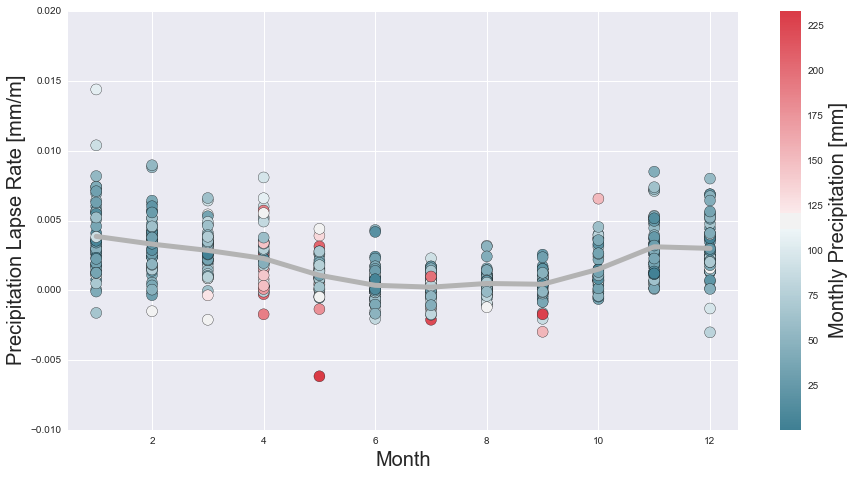

In [14]:
plt.figure(figsize=(15,7.5))
plt.plot(lapse3.index,lapse3.P,lw=5,c='0.7')
plt.scatter(lapse2.month,lapse2.P,s=120,c=lapse2.Ptotal,cmap=cmap)
plt.xlim(0.5,12.5);
c = plt.colorbar()
c.set_label('Monthly Precipitation [mm]',fontsize = 20)
plt.xlabel('Month',fontsize=20)
plt.ylabel('Precipitation Lapse Rate [mm/m]',fontsize=20)

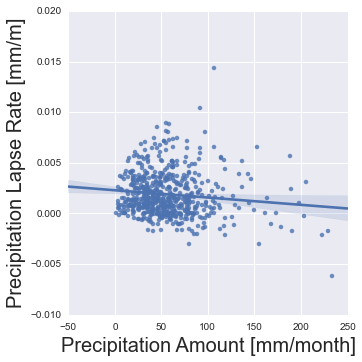

In [15]:
sns.lmplot('Ptotal','P',lapse2)
plt.xlabel('Precipitation Amount [mm/month]',fontsize=20)
plt.ylabel('Precipitation Lapse Rate [mm/m]',fontsize=20)

In [20]:
mod = sm.OLS.from_formula('P ~ Ptotal+1',lapse2).fit()
print mod.summary()

                            OLS Regression Results                            
Dep. Variable:                      P   R-squared:                       0.014
Model:                            OLS   Adj. R-squared:                  0.012
Method:                 Least Squares   F-statistic:                     8.243
Date:                Sun, 05 Jul 2015   Prob (F-statistic):            0.00424
Time:                        19:07:41   Log-Likelihood:                 2834.6
No. Observations:                 602   AIC:                            -5665.
Df Residuals:                     600   BIC:                            -5656.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept      0.0023      0.000     13.619      0.0

There does not appear to be much of a relationship between precipitation amount and Precipitation lapse rate. The relationship presented is significant, but the slope suggests that large storms occure when the precip. lapse rate is negative. These are likely convective summer storms.

## Generate Time Series of Temperature and P lapse Rates

In [19]:
head = '2003 9 28'
strt='2003-9-28'

# subset out each lapse rate
p = lapse[strt:].P.as_matrix()*0.001 # convert from mm to m [m/m]
tave = lapse[strt:].Tmean.as_matrix() # [C/m]
tmin = lapse[strt:].Tmin.as_matrix() # [C/m]
tmax = lapse[strt:].Tmax.as_matrix() # [C/m]

np.savetxt('./boulder_crn.lapse_rate_rain',p,comments='',header=head,fmt='%10.10f')
np.savetxt('./boulder_crn.lapse_rate_tmin',tmin,comments='',header=head,fmt='%10.6f')
np.savetxt('./boulder_crn.lapse_rate_tmax',tmax,comments='',header=head,fmt='%10.6f')
np.savetxt('./boulder_crn.lapse_rate_tave',tave,comments='',header=head,fmt='%10.6f')